# Analysing numpy.random package


This notebook contains information about numpy.random package, which is a part of the numpy package for Python, which is defined as the fundamental package for scientific computation in Python. 

The main purpose of numpy.random sub-package is to generate random numbers, which are very useful for many practical applications in mathematics, statistics, computation, finance and, in general, scientific computation models.

Although the above definition is quite straight-forward, there are many options included in this package, with the intention of covering many possible different specifications. Some features have been included in this package to manipulate and control the output and, thus, apply the most adecquate solutions for scientific analysis, facilitating this [otherwise mundane task.](https://hackaday.com/2009/05/26/dice-o-matic/)

However, an important advice needs to be taken in consideration upfront: despite the inmense help that this tools provide to scientific analysis, once we dive deeper into the documentation it is clearly stated that these random generation tools (and most of similar ones), are not trully random, but based on an internal __pseudorandom number generator (PRNG)__, which is essentially any algorithm for generating seemingly random but still reproducible data.

Therefore, such tools should not be used for security purposes, like password generation or encryption. There are specific tools in Python for that purpose, but those fall out of this investigation's scope.

This investigation will attempt to analyse these random number generation processes which are included in numpy.random and illustrate its main characteristics and differences through some practical examples.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Following this assignment's instructions, analysis will be divided into three separate sections:

1. __Use of the “Simple random data” and “Permutations” functions.__
2. __Use and purpose of five “Distributions” functions.__
3. __Use of seeds in generating pseudorandom numbers.__


## __1. Use of the "Simple random data" and "Permutations" functions.__

Under this denomination there are different functions, as listed below:
- rand(d0, d1, …, dn)
- randn(d0, d1, …, dn)
- randint(low[, high, size, dtype])
- random_integers(low[, high, size]) 
- random_sample([size])
- random([size])
- ranf([size])
- sample([size])
- choice(a[, size, replace, p])
- bytes(length): 

All these functions are quite similar, but there are some subtle differences that make one more suitable than the others depending on the particular circumstances or purposes for which they are used.

Basically, all of them provide an array of random values, which is a foundational principle of, for example, probability computation and experimental design. In fact, naming these tools as _sampling_ tools is not arbitrary. 

Sampling is the process through which estimations in a population (N) can be made by observing a fraction of that population, called _sample_ (_n_). In order for this sample to be representative of the population N, their _distribution_ needs to be alike.

Through this section we will use some of these sampling tools and try to show their differences and possible uses.

### Rand Function
```python
np.random.rand(d0, d1, …, dn)
```
***
As described on the documentation, rand function _"create(s) an array of the given shape and populate it with random samples from a uniform distribution over 0 and 1"._

Using DataFrames we can easilly see how this values are distributed. In this case, over 5,000 random samples it clearly shows an even distribution, having the same possibilities of obtaining any value in the range.

Thus, quartiles are roughly correspondant with the values. First quartile represents approximately 25% of the cases. Second quartile is 50%, and so on.

Adding a second random variable to the plot, we can observe this 2-dimensional distribution as completely random.

                 0
count  5000.000000
mean      0.503554
std       0.288510
min       0.000662
25%       0.255512
50%       0.505268
75%       0.751837
max       0.999627


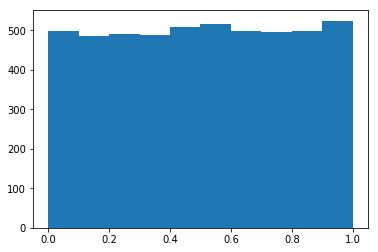

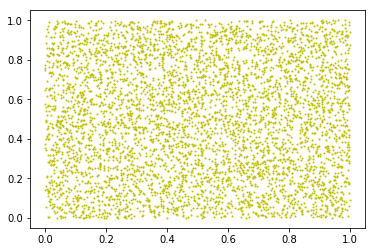

In [121]:
# Measures of central tendency with Panda Data Frames

x= np.random.rand(5000)
df = pd.DataFrame(x)
print (df.describe())

plt.hist(x)
plt.show()

# Plotting two random distributions (x,y)

y= np.random.rand(5000)

plt.plot(x,y,'y.', markersize=2)
plt.show()

### randn function
As the precedent, this function also provides an array with n random values, but in this case these values are within a range defined by a __Normal Standard distribution__, having mean=0 and Variance=1, as shown in the below table:

In [125]:
x= np.random.randn(5000)
df = pd.DataFrame(x)
print (df.describe())

                 0
count  5000.000000
mean      0.001868
std       1.001320
min      -3.177128
25%      -0.687123
50%       0.004807
75%       0.654894
max       4.239618


If we plot this vector generated by randn, we can easily see the resemblance with the typical Gaussian bell-shape function, with most of the values around the average (0):

(array([  4.,   2.,   5.,  11.,  13.,  21.,  29.,  28.,  47.,  66.,  75.,
         95., 133., 150., 174., 216., 227., 236., 263., 264., 302., 302.,
        290., 305., 273., 258., 216., 201., 159., 140.,  91.,  78.,  85.,
         65.,  51.,  40.,  24.,  23.,  19.,   8.,   4.,   3.,   1.,   0.,
          1.,   1.,   0.,   0.,   0.,   1.]),
 array([-3.17712775, -3.02879284, -2.88045792, -2.73212301, -2.5837881 ,
        -2.43545319, -2.28711828, -2.13878337, -1.99044846, -1.84211354,
        -1.69377863, -1.54544372, -1.39710881, -1.2487739 , -1.10043899,
        -0.95210407, -0.80376916, -0.65543425, -0.50709934, -0.35876443,
        -0.21042952, -0.06209461,  0.08624031,  0.23457522,  0.38291013,
         0.53124504,  0.67957995,  0.82791486,  0.97624977,  1.12458469,
         1.2729196 ,  1.42125451,  1.56958942,  1.71792433,  1.86625924,
         2.01459415,  2.16292907,  2.31126398,  2.45959889,  2.6079338 ,
         2.75626871,  2.90460362,  3.05293853,  3.20127345,  3.34960836,
 

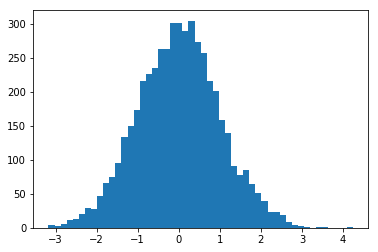

In [126]:
plt.hist(x, bins=50)

### randint function
In this case, random values obtained are integers in the specified interval, with the possibility to choose the the desired dtype of the output. Therefore, instead of a continous distribution, we are dealing with a discrete distribution, where values are finite. In the case below, this sample includes 5000 values between 0 and 9 (upper limit is not inclusive), but there are no values between any of the 10 members. For instance, a value will fall on 2 or 3, but never in between.

In a conyinous distribution, the probability of obtaining a specific value is nearly 0, although ypu can calculate the probability to obtain values above or below a specific value. On the other hand, discrete distributions allow to calculate the occurrence of a specific value. Sometimes, for practical and analytical reasons, continous distributions can be transformed into discrete ones, as in the histograms plot for the __rand__ function.

Some real-life examples of continous distributions can be time, distance or weight. And discrete variables can be years in your last bithday, number of kilometers and amount of kilograms. Note that the aforementioned variables can be either continous or discrete, depending on the precission of the measure and the purpose of the analysis.

Example of discrete variable: 

                 0
count  5000.000000
mean      4.484600
std       2.913256
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000


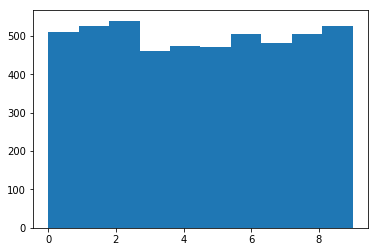

In [5]:
x=np.random.randint(0,10,5000)
plt.hist(x)
df = pd.DataFrame(x)
print (df.describe())

### sample, random_sample, random & ranf functions
These four are aliases for the same function, and can be used indiscriminately.

Returns an array of random float values between 0 and 1 (not inclusive) from the continuous uniform distribution, where all outcomes in a range between a minimum and maximum value are equally likely.

This distribution is used in statistics. A sample from this distribution (between zero and one) can be used to generate random samples from other distributions (by inversion of the cumulative form of the  distribution).

In [6]:
a= np.random.random_sample(10)
b= np.random.sample(10)
c= np.random.random(10)
d= np.random.ranf(10)
print (a, b, c, d)


[0.7350376  0.27386472 0.05538036 0.60388904 0.1323906  0.24388539
 0.2874319  0.27337326 0.36948249 0.13270261] [0.30360763 0.52371903 0.47101126 0.87600728 0.15382741 0.71768403
 0.60719681 0.53529476 0.38826729 0.150548  ] [0.41951772 0.04235919 0.2150298  0.67791311 0.94549163 0.43175398
 0.93733187 0.31357429 0.21762647 0.37813355] [0.10485681 0.43831222 0.93997479 0.88280548 0.75981057 0.83462789
 0.83787495 0.33234671 0.6229926  0.22938906]


### byte function
As explained in the first section, this package aims to facilitate tasks for analysis. This particular function is also providing random results, but in this case the only input is the length of the results and the output returns __bytes__.

In [238]:
np.random.bytes(1)

b'\x9d'

### choice function

This function, instead of generating an array of random values within a range, takes an array as input and randomly selects among its members. 

By default, uniform distribution is used to make the selection, but probailities can be specified with the parameter _p_.

The main difference with other similar functions is the fact that results might be generated for a non-uniform distribution by modifying the _p_ value:

In [128]:
unif=np.random.choice(4,10) #Uniform distribution: 2 random values from 0 to 3. 
print(unif)#The same result is obtained with np.random.ranint(0,4,2)

nonun=np.random.choice(4,10,p=[0.1,0.1,0.1,0.7]) #Probability of obtaining '3' is 7 times more likely
print(nonun)


[0 3 0 2 2 3 3 3 0 3]
[0 3 1 3 3 3 3 3 3 3]


Additionally, a replacement parameter can be switched off, preventing the function to select a previously selected value in the input array. However, this is also activated by default when using ___random.sample___ function This feature is quite useful for Combinatorics operations.

As defined by Wolfram MathWorld:
> _Combinatorics is the branch of mathematics studying the enumeration, combination, and permutation of sets of elements and the mathematical relations that characterize their properties._ 

Basically, the two main components in combinatronics are __combinations__ and __permutations__. 

Combinations are the possible outputs when taking _n_ elements from a pool of _m_ elements. This elements can be replaced after every extraction or not. This is especially useful when using categorical variables, such as an array composed by unique, non-countable values, in the form of strings:

In [231]:
# Superhero/villain generator. Try different random combinations!
a = np.random.choice(['Amazing','Mighty', 'Lousy', 'Hectic', 'Healthy','Politically Incorrect'])
b = np.random.choice(['Blue', 'Flying', 'Magenta', 'Transparent','Left-handed'])
c = np.random.choice(['Cucumber', 'Teddy Bear', 'Postman', 'Wizard','Worm','Siameses','Dolphin','Crab'])
d = np.random.choice(['the Moon','Galway', 'Hell', 'Mars', 'the Future','the Past'])
print("Behold the",a,b,c,"from",d,"!")

Behold the Mighty Blue Teddy Bear from Hell !


Permutations are similar, but in this case the __order__ in which those _n_ elements are selected is also taken in consideration.

There are basically two types of permutation:

- Repetition is Allowed: such as a phone number, which can have the same number repeated.
- No Repetition: for example the first three people in a running race. You can't be first and second.

1. Permutations with Repetition

These are the easiest to calculate. When a thing has n different types ... we have n choices each time!

For example: choosing 3 of those things, the permutations are:

n × n × n
(n multiplied 3 times)
